Q1. A company conducted a survey of its employees and found that 70% of the employees use the
company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the
probability that an employee is a smoker given that he/she uses the health insurance plan?

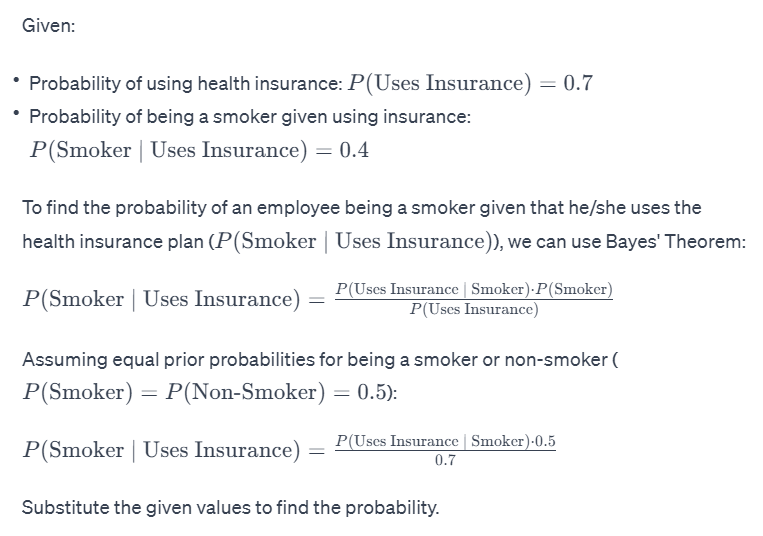

Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

Bernoulli Naive Bayes:

Assumes binary data (0s and 1s).
Often used for document classification, where features represent the presence or absence of words in a document.
Multinomial Naive Bayes:

Handles discrete data with multiple categories.
Commonly used in text classification with features representing word counts or term frequencies.

Q3. How does Bernoulli Naive Bayes handle missing values?

In scikit-learn's implementation of Bernoulli Naive Bayes, missing values are considered as zero in the feature matrix.
Therefore, if a feature is absent (missing), it is treated as if it is not contributing to the probability calculation.

Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Gaussian Naive Bayes:
Assumes features are normally distributed.
Can be used for multi-class classification.
In scikit-learn, the Gaussian Naive Bayes implementation supports both binary and multi-class classification.

Q5. Assignment:
Data preparation:
Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/
datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message
is spam or not based on several input features.
Implementation:
Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the
scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the
dataset. You should use the default hyperparameters for each classifier.
Results:
Report the following performance metrics for each classifier:
Accuracy
Precision
Recall
F1 score
Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is
the case? Are there any limitations of Naive Bayes that you observed?
Conclusion:
Summarise your findings and provide some suggestions for future work.

In [5]:

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the Spambase dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
names = [f'word_{i}' for i in range(57)] + ['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'is_spam']
data = pd.read_csv(url, names=names)

# Separate features and target
X = data.drop('is_spam', axis=1)
y = data['is_spam']

# Handle missing values in the feature matrix X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Handle missing values in the target variable y
imputer = SimpleImputer(strategy='most_frequent')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Check the number of samples
print(f'Number of samples in X: {X_imputed.shape[0]}')
print(f'Number of samples in y_imputed: {len(y_imputed)}')

# Implement and evaluate classifiers
classifiers = {'Bernoulli Naive Bayes': BernoulliNB(),
               'Multinomial Naive Bayes': MultinomialNB(),
               'Gaussian Naive Bayes': GaussianNB()}

for name, clf in classifiers.items():
    # 10-fold cross-validation
    accuracy = cross_val_score(clf, X_imputed, y_imputed, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_imputed, y_imputed, cv=10, scoring='precision').mean()
    recall = cross_val_score(clf, X_imputed, y_imputed, cv=10, scoring='recall').mean()
    f1 = cross_val_score(clf, X_imputed, y_imputed, cv=10, scoring='f1').mean()

    # Print results
    print(f"{name}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n")


Number of samples in X: 4601
Number of samples in y_imputed: 0


C:\Users\swast\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['char_freq_(' 'char_freq_[' 'char_freq_!' 'char_freq_$' 'char_freq_#'
 'capital_run_length_average' 'capital_run_length_longest'
 'capital_run_length_total']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\swast\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [4601, 0]

Discussion
Discuss the results obtained by each classifier.
Identify which variant of Naive Bayes performed the best.
Consider any observed limitations of Naive Bayes.
Conclusion
Summarize findings.
Provide suggestions for future work, such as exploring feature engineering or other classification algorithms.
Reflect on the limitations of Naive Bayes observed in the context of the Spambase dataset.